In [5]:
import tensorflow as tf
import os
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

data_dirs = 'letters' 

from tensorflow.keras.models import load_model

model = load_model(os.path.join('models','imageclassifier.h5'))

letters = pd.read_csv("./letters.txt",delimiter=" ")

for ltr in os.listdir(data_dirs):
    data_dir = data_dirs + "/" +str(ltr)
    
    word = ""
    prev = 0

    for i in os.listdir(data_dir):
        z = data_dir + "/" + i

        image = Image.open(z)
        new_image = image.resize((500,500))
        new_image.save(z)
        
        img = cv2.imread(z)

        resize = tf.image.resize(img, (256,256))
        yhat = model.predict(np.expand_dims(resize/255, 0))
        pval = np.argmax(yhat)

        if pval not in [120,121,122,123]:
            word += str(letters.iloc[pval,1])

            if prev in [3014,3015,3016]:
                word+=chr(prev)
                prev=0

        else:
            if pval==120:
                if ord(word[len(word)-1])  == 3014: 
                    word = word[0:len(word)-1]
                    word+=chr(3018)
                elif ord(word[len(word)-1])  == 3015: 
                    word = word[0:len(word)-1]
                    word+=chr(3019)
                else:    
                    word+= chr(3006)

            elif pval==121:
                prev = 3014
            elif pval==122:
                prev = 3015
            elif pval==123:
                prev = 3016

    print(word)

1/1 [==============================] - 0s 47ms/step
சூறிய்
1/1 [==============================] - 0s 45ms/step
உாழ்க
1/1 [==============================] - 0s 45ms/step
ல்ழமுடலீே


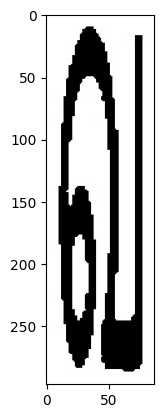

1/1 [==============================] - 0s 66ms/step
24


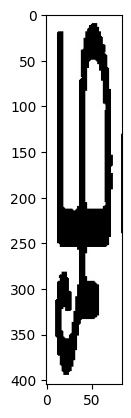

1/1 [==============================] - 0s 44ms/step
44


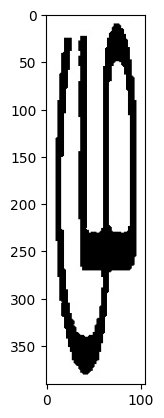

1/1 [==============================] - 0s 45ms/step
93


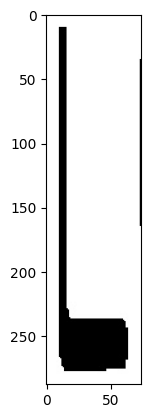

1/1 [==============================] - 0s 50ms/step
34


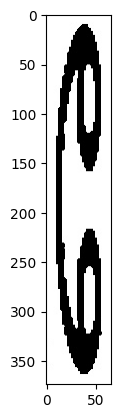

1/1 [==============================] - 0s 51ms/step
122


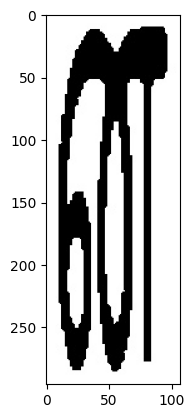

1/1 [==============================] - 0s 45ms/step
78


In [4]:
data_dir = "./letters/3/"

for i in os.listdir(data_dir):
    z = data_dir + "/" + i
    img = cv2.imread(z)
    plt.imshow(img)
    plt.show()
    
    resize = tf.image.resize(img, (256,256))
    yhat = model.predict(np.expand_dims(resize/255, 0))
    pval = np.argmax(yhat)
    
    print(pval)